# ML Course 4 - Practice (multiple and polynomial regressions)

## Subject

We will use here the same data set as for practice #3.

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
887,2014,PORSCHE,BOXSTER,TWO-SEATER,2.7,6,M6,Z,11.5,7.9,9.9,29,228
407,2014,FORD,FOCUS SFE FFV,COMPACT,2.0,4,A6,X,8.4,5.8,7.2,39,166
312,2014,DODGE,CHARGER FFV,FULL-SIZE,3.6,6,A8,E,16.8,10.3,13.9,20,222
288,2014,CHRYSLER,300 FFV,FULL-SIZE,3.6,6,A8,X,12.4,7.7,10.3,27,237
685,2014,LINCOLN,MKZ HYBRID,MID-SIZE,2.0,4,AV,X,6.2,6.4,6.3,45,145
633,2014,LAMBORGHINI,AVENTADOR COUPE,TWO-SEATER,6.5,12,A7,Z,22.8,12.9,18.3,15,421


* Make some plots of 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', with respect to 'CO2EMISSIONS'. What do these plots tell you about your capacity to model C02 emissions with a multiple regression model based on the three features?

In [4]:
features = data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
correlation = features.corr()
correlation

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
CYLINDERS,1.000000,0.934011,0.776788,0.849685
ENGINESIZE,0.934011,1.000000,0.819482,0.874154
FUELCONSUMPTION_COMB,0.776788,0.819482,1.000000,0.892129
CO2EMISSIONS,0.849685,0.874154,0.892129,1.000000


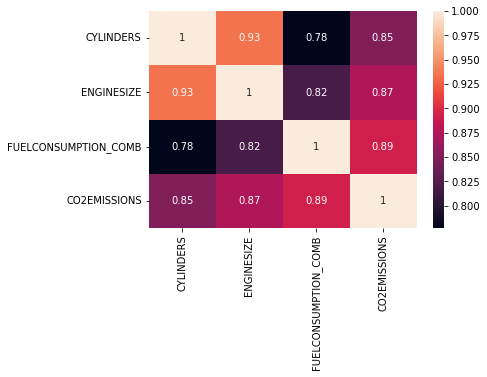

In [5]:
import seaborn as sns
_ = sns.heatmap(correlation, annot=True)

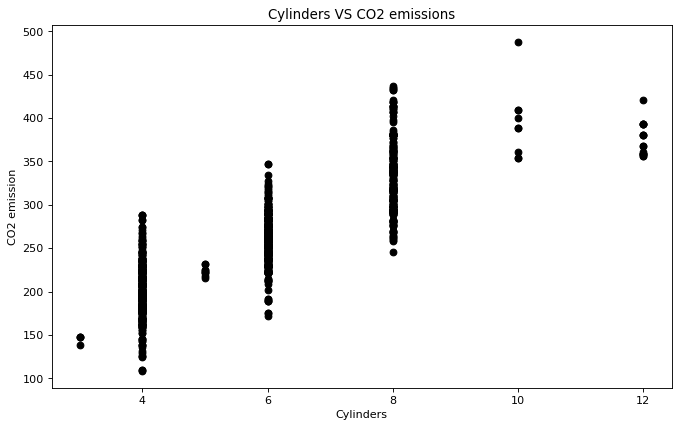

In [6]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['CYLINDERS'], data['CO2EMISSIONS'], c='black')
plt.xlabel("Cylinders")
plt.ylabel("CO2 emission")
plt.title("Cylinders VS CO2 emissions")
plt.show()

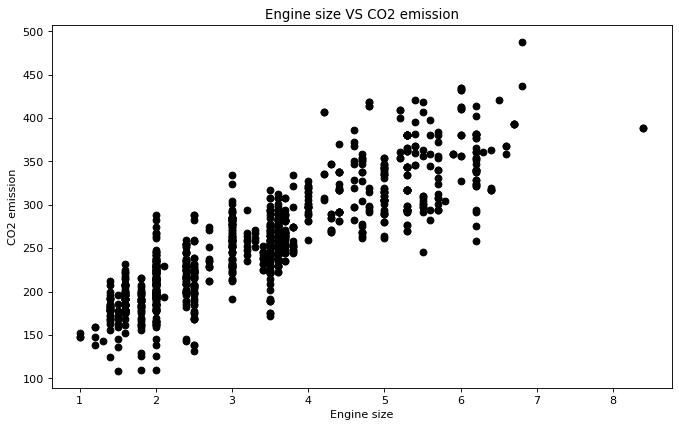

In [7]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], c='black')
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.title("Engine size VS CO2 emission")
plt.show()

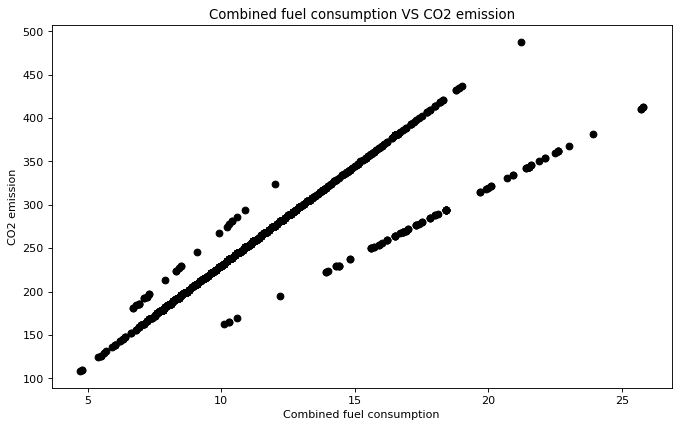

In [8]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['FUELCONSUMPTION_COMB'], data['CO2EMISSIONS'], c='black')
plt.xlabel("Combined fuel consumption")
plt.ylabel("CO2 emission")
plt.title("Combined fuel consumption VS CO2 emission")
plt.show()

From these plot, we can see Combined fuel consumption is more correlated with CO2 emissions.

* Train a multiple linear regression with these three predictors. What are the coefficients associated with each predictor?

In [9]:
X = features.drop('CO2EMISSIONS', axis=1)
y = features['CO2EMISSIONS'].values.reshape(-1,1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
from sklearn.linear_model import LinearRegression
reg_multiple = LinearRegression()
reg_multiple.fit(X_train, y_train)
print("The linear model is: Y = {:.3}  +  {:.3} * CYLINDERS  +  {:.3} * ENGINESIZE  +  {:.3} * FUELCONSUMPTION_COMB".format(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1], reg_multiple.coef_[0][2]))

The linear model is: Y = 68.4  +  7.55 * CYLINDERS  +  11.9 * ENGINESIZE  +  9.1 * FUELCONSUMPTION_COMB


For 'CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', the coefficients are 7.55, 11.9, 9.1 respectively.

* Assess the performance of your model. What do you think, when compared with the accuracy of the linear regression with 'FUELCONSUMPTION_COMB' as single predictor (computed in last question of practice #3)?

In [13]:
from sklearn.metrics import r2_score

def evaluate_regression(y_pred, y_val):
    y_pred = y_pred.squeeze()
    y_val = y_val.squeeze()
    print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_val) ** 2))
    print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_val) ** 2)))
    print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_val)))
    print("Coefficient of determination (R^2): %.2f" % r2_score(y_val, y_pred))
y_pred = reg_multiple.predict(X_val)
evaluate_regression(y_pred, y_val)

Mean square error (MSE): 595.36
Root mean square error (RMSE): 24.40
Mean absolute error (MAE): 18.14
Coefficient of determination (R^2): 0.85


The RMSE is lower here (24.40 here vs. 28.15 before), and the  𝑅2  coefficient is higher (0.85 vs 0.81) so it seems that this multiple linear regression is a slightly better predictor than combined fuel consumption for CO2 consumption prediction.

* 'FUELCONSUMPTION_CITY' is the urban consumption while FUELCONSUMPTION_HWY is the consumption on the highway. 'FUELCONSUMPTION_COMB' is the combined consumption and is computed as a weighted sum of 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' so to represent a standard driver behaviour. How are these three features correlated between each other?

In [14]:
fuel_consumption = data[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
correlation = fuel_consumption.corr()
correlation

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
FUELCONSUMPTION_CITY,1.000000,0.965718,0.995542
FUELCONSUMPTION_HWY,0.965718,1.000000,0.985804
FUELCONSUMPTION_COMB,0.995542,0.985804,1.000000


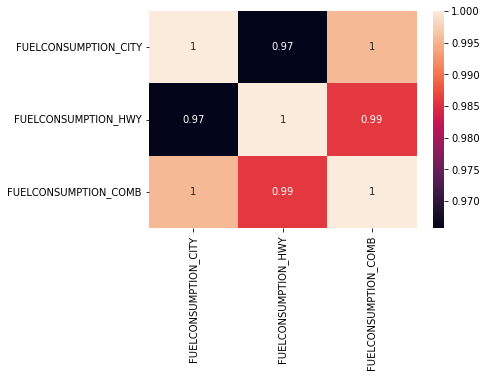

In [15]:
import seaborn as sns
_ = sns.heatmap(correlation, annot=True)

'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' are totally correlated with 'FUELCONSUMPTION_COMB' when 'FUELCONSUMPTION_HWY' is more correlated to 'FUELCONSUMPTION_COMB' because there is more fuel consumption on highway.

* Add 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY' as additional predictors to your model of question #2. What is the gain of accuracy, and how do you interpret that?

In [16]:
X = data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_va = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
from sklearn.linear_model import LinearRegression
reg_multiple = LinearRegression()
reg_multiple.fit(X_train, y_train)
print("The linear model is: Y = {:.5}  +  {:.5} * CYLINDERS  +  {:.5} * ENGINESIZE  +  {:.5} * FUELCONSUMPTION_CITY  +  {:.5} * FUELCONSUMPTION_HWY  +  {:.5} * FUELCONSUMPTION_COMB".format(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1], reg_multiple.coef_[0][2], reg_multiple.coef_[0][3], reg_multiple.coef_[0][4]))

The linear model is: Y = 68.106  +  7.6331 * CYLINDERS  +  11.868 * ENGINESIZE  +  -12.723 * FUELCONSUMPTION_CITY  +  -10.094 * FUELCONSUMPTION_HWY  +  31.962 * FUELCONSUMPTION_COMB


In [20]:
y_pred = reg_multiple.predict(X_val)
evaluate_regression(y_pred, y_val)

Mean square error (MSE): 597.46
Root mean square error (RMSE): 24.44
Mean absolute error (MAE): 18.14
Coefficient of determination (R^2): 0.85


The accuracy is exactly same with the previous model. Because 'FUELCONSUMPTION_COMB' is the combined consumption and is computed as a weighted sum of 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY'.

* Plot 'CO2EMISSIONS' with respect to 'FUELCONSUMPTION_COMB' for each possible value of 'FUELTYPE' (i.e. plot the scatter dots with one distinct color for each value of 'FUELTYPE'). Do you think that 'FUELTYPE' and 'FUELCONSUMPTION_COMB' could be sufficient predictors for 'CO2EMISSIONS' estimation with a multiple linear regression model? Compute the accuracy.

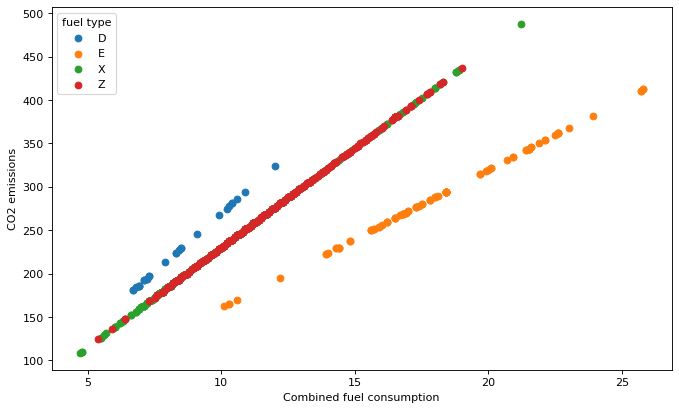

In [21]:
groups = data.groupby("FUELTYPE")
plt.figure(figsize=(10,6), dpi= 80)
for name, group in groups:
    plt.scatter(group["FUELCONSUMPTION_COMB"], group["CO2EMISSIONS"], label=name)
plt.xlabel("Combined fuel consumption")
plt.ylabel("CO2 emissions")
plt.legend(title = 'fuel type')
plt.show()

In [23]:
data['FUELTYPE'] = data['FUELTYPE'].replace(['D', 'E', 'X', 'Z'], [0, 1, 2, 3])
X = data[['FUELTYPE', 'FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS'].values.reshape(-1,1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [25]:
from sklearn.linear_model import LinearRegression
reg_multiple = LinearRegression()
reg_multiple.fit(X_train, y_train)
print("The linear model is: Y = {:.2}  +  {:.2} * FUELTYPE  +  {:.2} * FUELCONSUMPTION_COMB".format(reg_multiple.intercept_[0], reg_multiple.coef_[0][0], reg_multiple.coef_[0][1]))

The linear model is: Y = 2.6e+01  +  1.7e+01 * FUELTYPE  +  1.7e+01 * FUELCONSUMPTION_COMB


In [26]:
y_pred = reg_multiple.predict(X_val)
evaluate_regression(y_pred, y_val)

Mean square error (MSE): 562.81
Root mean square error (RMSE): 23.72
Mean absolute error (MAE): 17.90
Coefficient of determination (R^2): 0.86


I think that 'FUELTYPE' and 'FUELCONSUMPTION_COMB' is a sufficient predictors for 'CO2EMISSIONS' estimation with a multiple linear regression model. Because comparing to the other models, this model has highest 𝑅2 coefficient value and lowest RMSE value.